<div style="background-color: #1f77b4; color: #FFFFE0; padding: 20px; border-radius: 5px; margin-top: 20px; border: 1px solid #b8daff;"
>
<h3>Tufte's Visualizations</h3>
<p><p>
<h4>Background Information</h4>
<p> </p>
<h4>History, Techniques</h4>
<p> </p>
<h4>Interpretation.</h4>
</div>

In [ ]:
import matplotlib.pyplot as plt

# ----- Example 1: Sparkline -----
spark_data = [80, 82, 78, 85, 90, 93, 95, 97, 92, 88, 85, 83]

fig = plt.figure(figsize=(4, 0.8))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(spark_data, linewidth=1)
ax.axis('off')
plt.show()

# ----- Example 2: Slopegraph -----
categories = ['Product A', 'Product B', 'Product C', 'Product D']
year1 = [10, 15, 7, 12]   # 2020 values
year2 = [13, 13, 9, 15]   # 2024 values

fig = plt.figure(figsize=(4, 3))
ax = fig.add_axes([0, 0, 1, 1])

for i, cat in enumerate(categories):
    ax.plot([0, 1], [year1[i], year2[i]], marker='o')
    ax.text(-0.02, year1[i], f'{cat} {year1[i]}', ha='right', va='center', fontsize=8)
    ax.text(1.02, year2[i], f'{year2[i]}', ha='left', va='center', fontsize=8)

ax.set_xlim(-0.2, 1.2)
ax.set_xticks([])
ax.set_yticks([])
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)
plt.title('Change 2020 → 2024', pad=10)
plt.show()

# ----- Example 3: Dot Plot -----
regions = ['North', 'South', 'East', 'West']
scores = [75, 62, 89, 70]

fig = plt.figure(figsize=(4, 2))
ax = fig.add_axes([0.15, 0.1, 0.8, 0.8])
ax.scatter(scores, regions)
ax.axis('off')

for i, val in enumerate(scores):
    ax.text(val + 2, regions[i], str(val), va='center', fontsize=8)

plt.show()

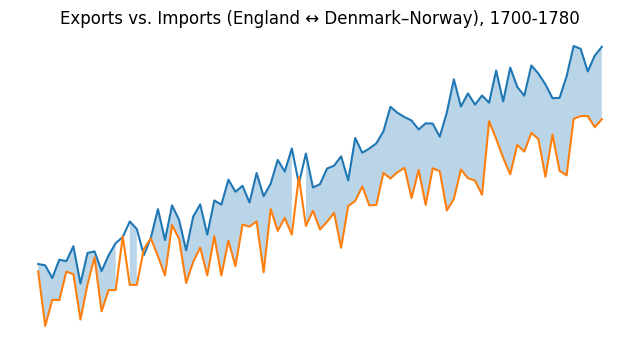

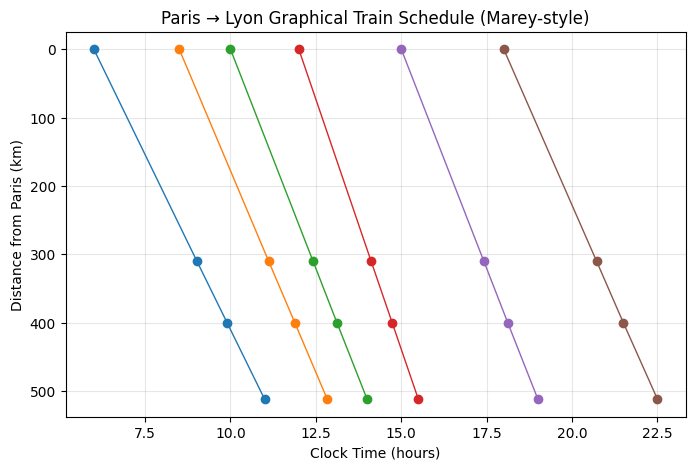

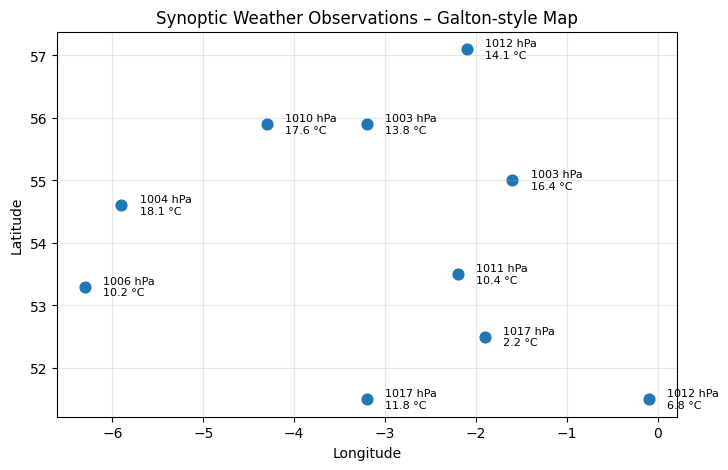

In [8]:
import pandas as pd, matplotlib.pyplot as plt
import os

# Change current path to where your data files are stored

data_path = '/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2024/BIS 411 - Fall 2024/Python-Fall-2024-Notebooks/Data Files for Python'
os.chdir(data_path)


# ------------------------------------------------------------------
# 1. Playfair – Exports vs. Imports (1700-1780)
# ------------------------------------------------------------------
df_playfair = pd.read_csv("playfair_trade.csv")

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df_playfair["year"], df_playfair["exports"],
        label="Exports", lw=1.5)
ax.plot(df_playfair["year"], df_playfair["imports"],
        label="Imports", lw=1.5)

# Shade years with a trade surplus
ax.fill_between(df_playfair["year"],
                df_playfair["exports"],
                df_playfair["imports"],
                where=df_playfair["exports"] > df_playfair["imports"],
                alpha=0.30)

ax.set_axis_off()                     # classic Playfair minimalism
plt.title("Exports vs. Imports (England ↔ Denmark–Norway), 1700-1780")
plt.show()

# ------------------------------------------------------------------
# 2. Marey – Paris → Lyon Graphical Train Schedule
# ------------------------------------------------------------------
df_marey = pd.read_csv("marey_paris_lyon.csv")

fig, ax = plt.subplots(figsize=(8, 5))
for train_id, grp in df_marey.groupby("train"):
    ax.plot(grp["time_hours"], grp["km"],
            marker="o", lw=1, label=train_id)

ax.set_xlabel("Clock Time (hours)")
ax.set_ylabel("Distance from Paris (km)")
ax.invert_yaxis()                     # Paris at top, Lyon at bottom
ax.grid(alpha=0.30)
plt.title("Paris → Lyon Graphical Train Schedule (Marey-style)")
plt.show()

# ------------------------------------------------------------------
# 3. Galton – Daily Synoptic Weather Map
# ------------------------------------------------------------------
df_weather = pd.read_csv("galton_weather.csv")

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(df_weather["lon"], df_weather["lat"], s=60)

for _, r in df_weather.iterrows():
    ax.text(r["lon"] + 0.20, r["lat"],
            f"{int(r['pressure_hPa'])} hPa\n{r['temp_C']:.1f} °C",
            fontsize=8, va="center")

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(alpha=0.30)
plt.title("Synoptic Weather Observations – Galton-style Map")
plt.show()

